# Smtp Modülü ile Mail Gönderme


Bu derste smtplib modülü ile beraber mail atmaya öğrenmeye çalışacağız. Mail atmak için bir tane SMTP serverına ihtiyacımız olacağı için biz bu derste ***GMAİL SMTP Server'ına *** bağlanarak mail atma işlemimizi gerçekleştireceğiz.

Ancak öncelikle *gmail* üzerinden güvensiz uygulamalara izin vermemiz gerekiyor. İlk olarak şu linke gidiyoruz;

https://myaccount.google.com/lesssecureapps

Artık mail atma kodumuzu yazabiliriz.



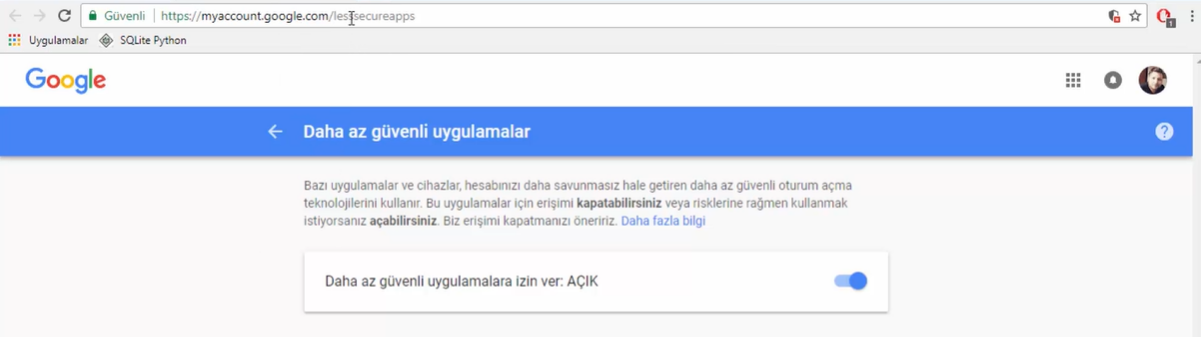

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart  # mail yapısını oluşturacak.
from email.mime.text import MIMEText    # mail içine yazacaklarımız için.
import sys  # ekrana hata mesajını yazdırmak için.
"""
SMTP Modülü ile mail gönderme

İlk olarak daha az güvenli uygulamalar için öncelikle aşağıdaki linke gidiyoruz ve güvenliği
kaldırıyoruz.

https://myaccount.google.com/lesssecureapps

"""

mesaj = MIMEMultipart()  # Mail yapımızı oluşturuyoruz.

mesaj["From"] =  "coskun.m.murat@gmail.com" # Kimden Göndereceğimiz

mesaj["To"] = "coskun.m.murat@gmail.com" # Kime Göndereceğimiz

mesaj["Subject"] = "Smtp Mail Gönderme"  # Mailimizin Konusu


# Mailimizin İçeriği
yazi = """

Merhaba, Python ile mail gönderiyorum.    

Mustafa Murat Coşkun


"""  


mesaj_govdesi =  MIMEText(yazi,"plain")  # Mailimizin gövdesini bu sınıftan oluşturuyoruz.

mesaj.attach(mesaj_govdesi) # Mailimizin gövdesini mail yapımıza ekliyoruz.



try:
    mail =  smtplib.SMTP("smtp.gmail.com", 587)  # SMTP objemizi oluşturuyoruz ve gmail smtp server'ına bağlanıyoruz.

    mail.ehlo() # SMTP serverına kendimizi tanıtıyoruz.
 
    mail.starttls() # Adresimizin ve Parolamızın şifrelenmesi için gerekli

    mail.login("gmail_adresi","gmail_parola") # SMTP server'ına giriş yapıyoruz. Kendi mail adresimizi ve parolamızı yapıyoruz.

    mail.sendmail(mesaj["From"], mesaj["To"], mesaj.as_string())  # Mailimizi gönderiyoruz.
    print("Mail başarıyla gönderildi....")
    mail.close()  # Smtp serverımızın bağlantısını koparıyoz.

except:
    sys.stderr.write("Mail göndermesi başarısız oldu...") # Herhangi bir bağlanma sorunu veya mail gönderme sorunu olursa
    sys.stderr.flush()